### **1.0 Introduction:**

The prediction of individual income levels is a crucial task with numerous applications in fields such as marketing, finance, and social policy. This project aims to harness the power of machine learning to develop a model that accurately predicts whether a person's income exceeds $50,000 per year based on census data.s.

#### **1.1 Objectives**

1. Explore and analyze the census data to identify relevant features and patterns.
2. Engineer new features and preprocess the data for model development.
3. Build and train a machine learning model to predict whether a person's income exceeds $50,000 per year.
4. Evaluate the performance of the model using appropriate metrics.
5. Provide insights and recommendations based on the findings from the data analysis and model development.
6. Identify the most important factors influencing income levels.
7. Develop a predictive model that can be used to inform decision-making in various fields.

By achieving these objectives, this project will demonstrate the potential of machine learning in predicting income levels and provide valuable insights into the factors that influence socioeconomic outcomes.

*Author: Muhammad Usman*

### **2.0. Data Collection and Preparation**

### **2.1 Import the necessary Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import  roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import auc
import joblib, pickle
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

#### **2.2 Loading Dataset**

In [2]:
# Loading Datasets
data = pd.read_csv('income_data.csv')

# Display the first five rows
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### **2.3 Inspection of the Dataset**

In [40]:
# Review Data types and summary statistics
display(data.info())
print("=============================================")
display(data.describe())
print("=============================================")
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


(48842, 15)

In [43]:
# Checking for Duplicates and Null Values
display(data.isnull().sum())
print("=============================================")
display(data.duplicated().sum())
print("=============================================")
display(data.dtypes)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

48

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### **2.4 Handling Missing , Duplicate Values and Irrelevant Features**

In [45]:
# Displaying the columns
display(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
# Removing the irrelevant features
data = data.drop(['fnlwgt','education-num', 'relationship'], axis = 1)

In [18]:
# Handling Missing Value
cat_variables = data.select_dtypes(include=['object']).columns
num_variables = data.select_dtypes(include=['int64']).columns
display(cat_variables)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [6]:
# Imputing the missing value on cat_variable
imputer = SimpleImputer(strategy='most_frequent')
data[cat_variables] = imputer.fit_transform(data[cat_variables])
# Check for missing values
display(data.isnull().sum())

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
# Removing Duplicate
data = data.drop_duplicates()
# Checking duplicates
display(data.duplicated().sum())

0

In [7]:
data.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


### **3. Exploratory Data Analysis (EDA)**

#### **Objectives for EDA**
 - Distribution of Income Levels
 - Age Distribution by Income
 - Education and Income Levels
 - Occupation Impact on Income Level
 - Marital Status and Income Level


#### **3.1 Distribution of Income Levels**

The initial data inspection revealed a binary classification of income into two groups '<=50k' and '>50k'. Next i will perform a class distribution analysis by counting the occurences of each income class, which will provide valuable information on the datasets's class balance.

In [9]:
income_dist = data['income'].value_counts()
income_dist

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

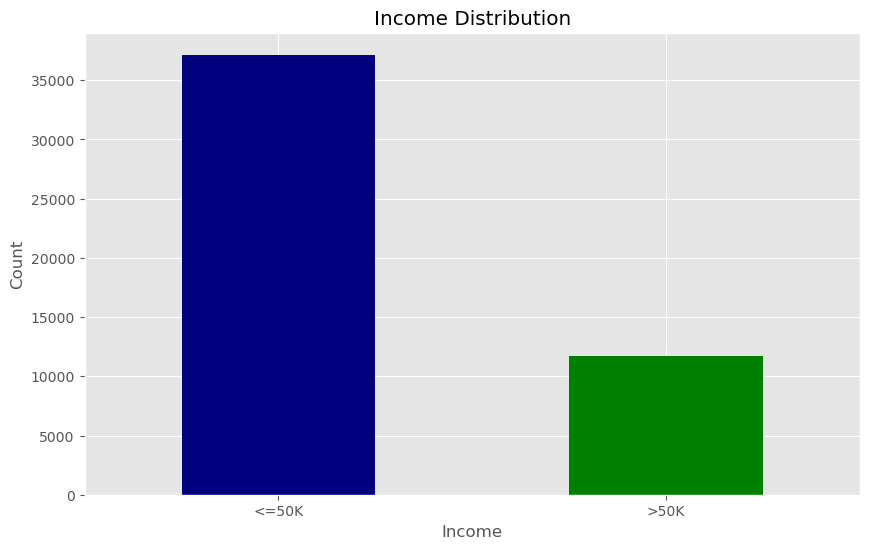

In [10]:
# Plot 1: Income Distribution
plt.figure(figsize=(10, 6))
income_dist.plot(kind='bar', color=['navy', 'green'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### **3.2 Age Distribution by Income**

There is a trend that shows older people tend to have higher incomes. This suggests that age is a relevant feature for predicting income.

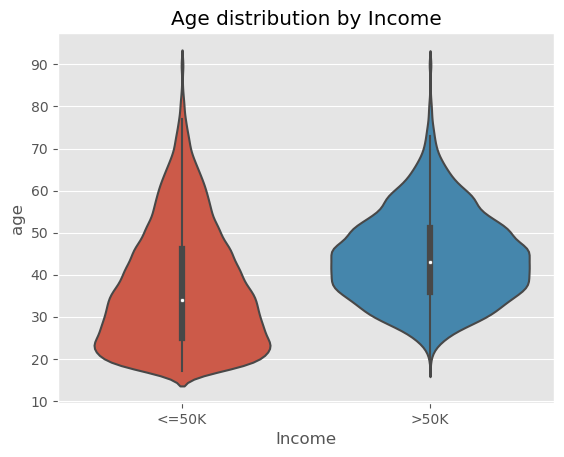

In [6]:
# Plot the Violin Plot
sns.violinplot(x='income', y='age', data=data)
plt.title('Age distribution by Income')
plt.xlabel('Income')
plt.ylabel('age')
plt.show()

#### **3.3 Education and Income Levels**

Higher education levels are strongly correlated with higher income. Individuals with advanced degrees or higher education are more likely to earn more dollars. 

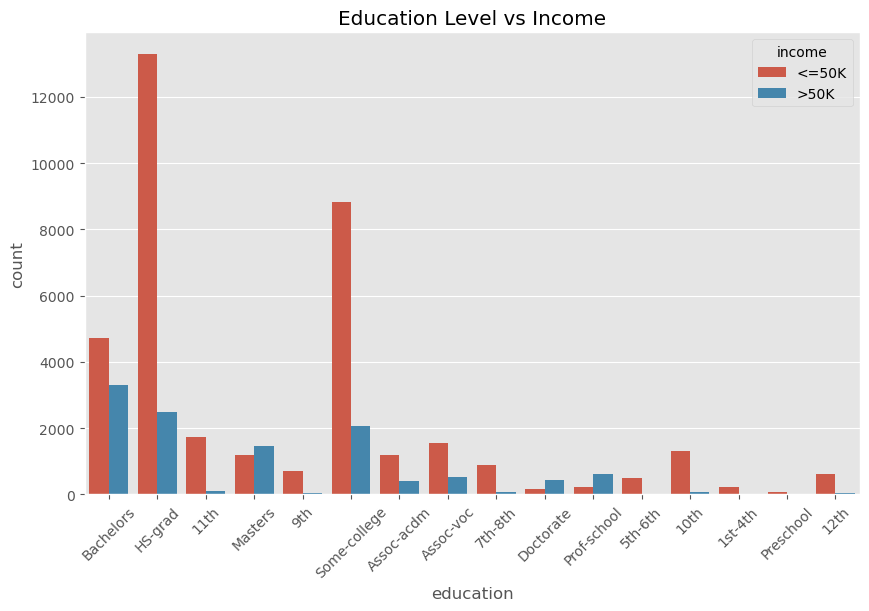

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Education Level vs Income')
plt.xticks(rotation=45)
plt.show()

#### **3.4 Occupation Impact on Income Level**

Some occupations have a higher likelihood of being associated with higher income 
level.e

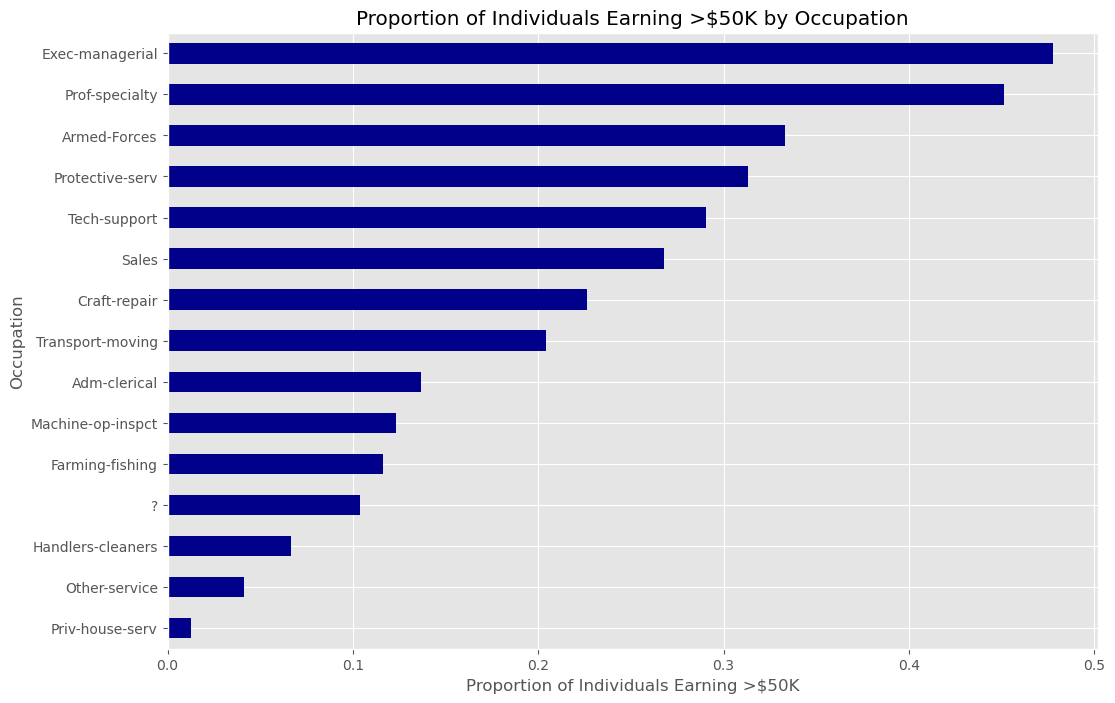

In [11]:
# Calculate the proportion of individuals earning >$50K for each occupation
occupation_income = data.groupby('occupation')['income'].value_counts(normalize=True).unstack()
high_income_proportion = occupation_income['>50K']
# Sort the occupations by the proportion of high-income earners
high_income_proportion = high_income_proportion.sort_values()
# Plotting the data
plt.figure(figsize=(12, 8))
high_income_proportion.plot(kind='barh', color='darkblue')
plt.xlabel('Proportion of Individuals Earning >$50K')
plt.ylabel('Occupation')
plt.title('Proportion of Individuals Earning >$50K by Occupation')
plt.show()

#### **3.6 Marital Status and Income Level**

Marital Status seems to have a significant impact on income. This could be due to 
various socio-economic factors and stability associated with marriage

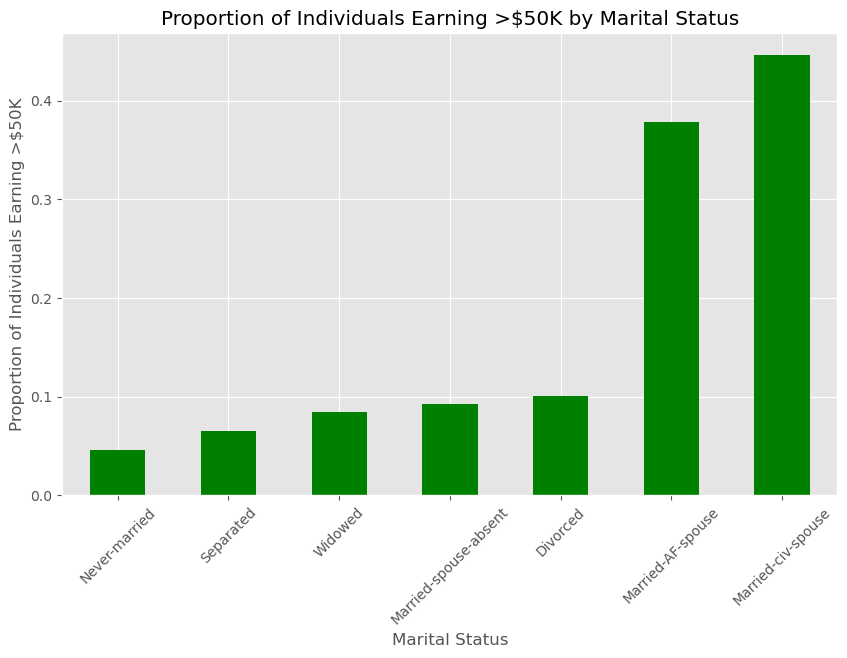

In [12]:
# Calculate the proportion of individuals earning >$50K for each marital status
marital_income = data.groupby('marital-status')['income'].value_counts(normalize=True).unstack()
high_income_proportion_marital = marital_income['>50K']
# Sort the marital statuses by the proportion of high-income earners
high_income_proportion_marital = high_income_proportion_marital.sort_values()
# Plotting the data
plt.figure(figsize=(10, 6))
high_income_proportion_marital.plot(kind='bar', color='green')
plt.ylabel('Proportion of Individuals Earning >$50K')
plt.xlabel('Marital Status')
plt.title('Proportion of Individuals Earning >$50K by Marital Status')
plt.xticks(rotation=45)

plt.show()

### **4.0  Data Preprocessing and Feature Engineering**

In [19]:
# Segregating numerical and categorical features
x_num = data[num_variables]
x_cat = data[cat_variables.drop('income')] 
# income was dropped in order to prevent Data leakage, Overfitting and in fact it is the target variable


In [23]:
# Encoding Categorical Data by using one hot encoder
encoder = OneHotEncoder(sparse=False)
x_cat_encoded =pd.DataFrame(encoder.fit_transform(x_cat), columns=encoder.get_feature_names_out())



x_cat_encoded

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_nan,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Standardize numerical features
scaler = StandardScaler()
x_num_scaled = pd.DataFrame(scaler.fit_transform(x_num), columns=num_variables)
x_num_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087
...,...,...,...,...,...,...
48837,0.025996,0.243884,1.136512,-0.144804,-0.217127,-0.356894
48838,1.849433,1.247492,-0.419335,-0.144804,-0.217127,-0.034087
48839,-0.046942,1.754865,1.136512,-0.144804,-0.217127,0.772930
48840,0.390683,-1.001612,1.136512,0.587220,-0.217127,-0.034087


In [24]:
# Combine the  numerical and categorical features
x_processed = pd.concat([x_num_scaled, x_cat_encoded], axis=1)
x_processed

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,0.243884,1.136512,-0.144804,-0.217127,-0.356894,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,1.849433,1.247492,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,-0.046942,1.754865,1.136512,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,0.390683,-1.001612,1.136512,0.587220,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### **5.0 Model Development**

#### **5.1 Train Test Split**

In [47]:
# Splitting Dataset into features & Labels
x = x_processed # x is the features
y = data['income'] # y is the Target Variable
# Splittint Datasets into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### **5.2 Model Selection and Training**

I plan to evaluate the performance of five different Machine Learning Algorithms, which are:
- Logistics Regression
- Decision Tree
- Random Forest
- ADA Boosting.
- K-Nearest Neighbor
  
To determine which one yields the best results for my classification task.

#### **5.2.1 Logistic Regression**

In [26]:
# Initialization of Logistic Regression
log_model = LogisticRegression(max_iter=1000)
# Train the model
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Predict the model
log_pred = log_model.predict(x_test)
# Predicting Probablities
y_pred_prob = log_model.predict_proba(x_test)[:, 1]

#### Evaluate the model

We evaluate the model's performance using various metrics such as accuracy, confusion matrix, precision, recall, and F1-score.

In [31]:
log_acc = accuracy_score(y_test, log_pred)
log_pre = precision_score(y_test, log_pred, pos_label='>50K')
log_f1 = f1_score(y_test, log_pred, pos_label='>50K')
log_recall = recall_score(y_test, log_pred, pos_label='>50K')
roc_auc_log= roc_auc_score(y_test, y_pred_prob)



print("RESULTS")
print(f"Accuracy is: {round(log_acc,2)}")
print(f'Precision score is: {round(log_pre,2)}')
print(f"F1 Score is: {round(log_f1,2)}")
print(f"Recall Score is: {round(log_recall,2)}")
print(f"ROC Score is: {round(roc_auc_log, 2)}")

RESULTS
Accuracy is: 0.85
Precision score is: 0.74
F1 Score is: 0.65
Recall Score is: 0.59
ROC Score is: 0.91


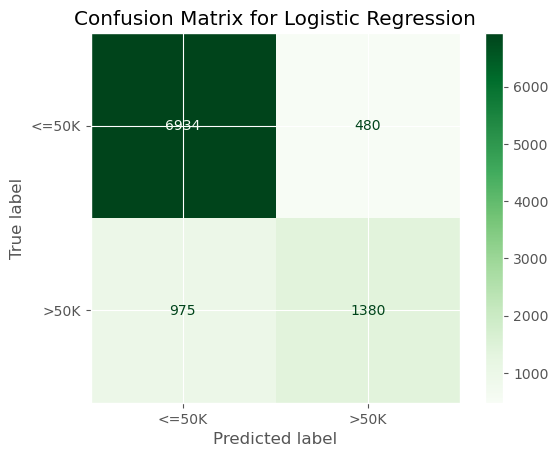

In [32]:
# Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, log_pred)
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix, display_labels=['<=50K', '>50K'])
log_reg_disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

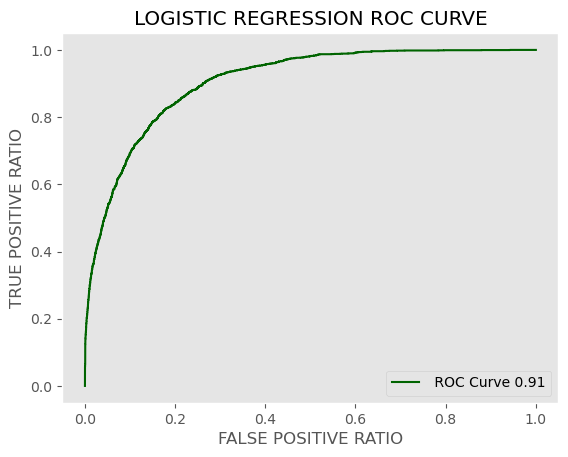

In [33]:
# ROC curve
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_prob, pos_label='>50K')
log_auc = auc(fpr_log, tpr_log)

# Plot ROC Curve
plt.plot(fpr_log, tpr_log, color='darkgreen', label=f' ROC Curve {log_auc:.2f}')
plt.title('LOGISTIC REGRESSION ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.grid()


#### **5.2.2 Decision Tree**

In [38]:
# Initialising the Decision Tree Model 
clf = DecisionTreeClassifier(random_state=42)

# Training the Model
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [83]:
# PRedicting the Model
clf_pred = clf.predict(x_test)
# Predicting Probablities
y_pred_prob_clf = clf.predict_proba(x_test)[:, 1]

In [88]:
# Evaluating the model
clf_acc = accuracy_score(y_test, clf_pred)
clf_pre = precision_score(y_test, clf_pred, pos_label='>50K')
clf_f1 = f1_score(y_test, clf_pred, pos_label='>50K')
clf_recall = recall_score(y_test, clf_pred, pos_label='>50K')
clf_roc_auc = roc_auc_score(y_test, y_pred_prob_clf)

print("RESULTS")
print(f"Accuracy is: {round(clf_acc,2)}")
print(f'Precision score is: {round(log_pre,2)}')
print(f"F1 Score is: {round(log_f1,2)}")
print(f"Recall Score is: {round(log_recall,2)}")
print(f'ROC Score is: {round(clf_roc_auc,2)}')

RESULTS
Accuracy is: 0.82
Precision score is: 0.74
F1 Score is: 0.64
Recall Score is: 0.57
ROC Score is: 0.77


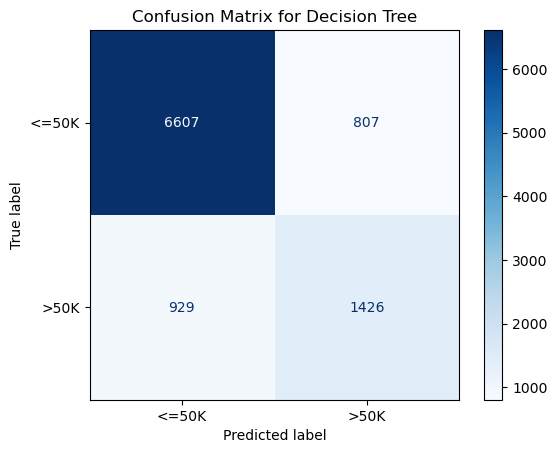

In [91]:
# Confusion Matrix
clf_conf_matrix = confusion_matrix(y_test, clf_pred)
clf_disp = ConfusionMatrixDisplay(confusion_matrix=clf_conf_matrix, display_labels=['<=50K', '>50K'])
clf_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

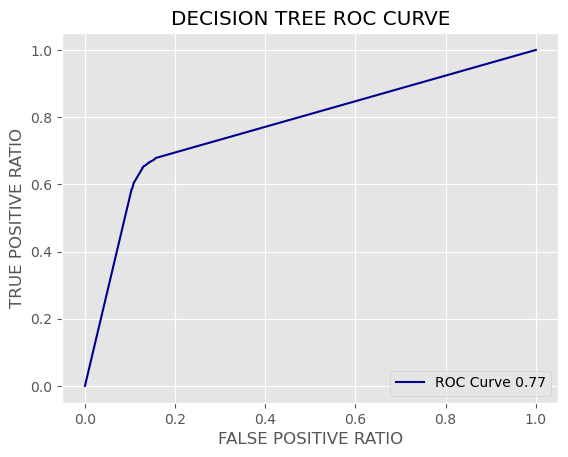

In [192]:
# ROC
fpr_clf, tpr_clf, thresholds = roc_curve(y_test, y_pred_prob_clf, pos_label='>50K')
clf_auc = auc(fpr_clf, tpr_clf)
# Plot ROC Curve
plt.plot(fpr_clf, tpr_clf, color='darkblue', label=f'ROC Curve {clf_auc:.2f}')
plt.title('DECISION TREE ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.show()


#### **5.2.3 Random Forest**

In [42]:
# Initilizing Random Forest
rand_forest = RandomForestClassifier()

In [145]:
# Train the Model
rand_forest.fit(x_train, y_train)

RandomForestClassifier()

In [146]:
# Predict the Model
rand_pred = rand_forest.predict(x_test)
# Pricting the Probabilities
rand_pred_prob = rand_forest.predict_proba(x_test)[:,1]

#### Evaluate the Model


We evaluate the model's performance using various metrics such as accuracy, confusion matrix, precision, recall, and F1-score.

In [150]:
rand_acc = accuracy_score(y_test, rand_pred)
rand_pre = precision_score(y_test, rand_pred, pos_label='>50K')
rand_f1 = f1_score(y_test, rand_pred, pos_label='>50K')
rand_recall = recall_score(y_test, rand_pred, pos_label='>50K')
rand_roc = roc_auc_score(y_test,rand_pred_prob)


print("RESULTS")
print(f"Accuracy is: {round(rand_acc,2)}")
print(f'Precision score is: {round(rand_pre,2)}')
print(f"F1 Score is: {round(rand_f1,2)}")
print(f"Recall Score is: {round(rand_recall,2)}")
print(f"ROC Score is: {round(rand_roc,2)}")

RESULTS
Accuracy is: 0.85
Precision score is: 0.71
F1 Score is: 0.66
Recall Score is: 0.61
ROC Score is: 0.89


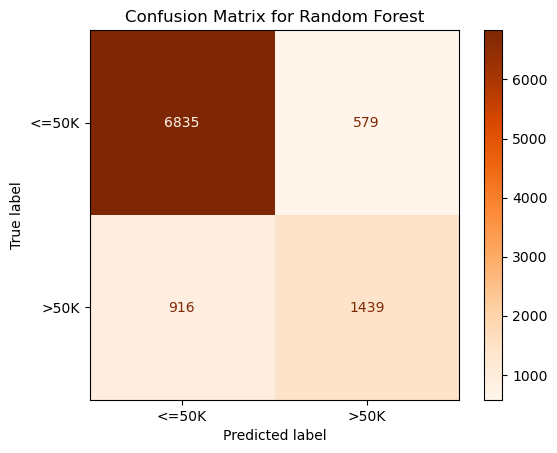

In [104]:
# Confusion Matrix
rand_conf_matrix = confusion_matrix(y_test, rand_pred)
rand_disp = ConfusionMatrixDisplay(confusion_matrix=rand_conf_matrix, display_labels=['<=50K', '>50K'])
rand_disp.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix for Random Forest')
plt.show()

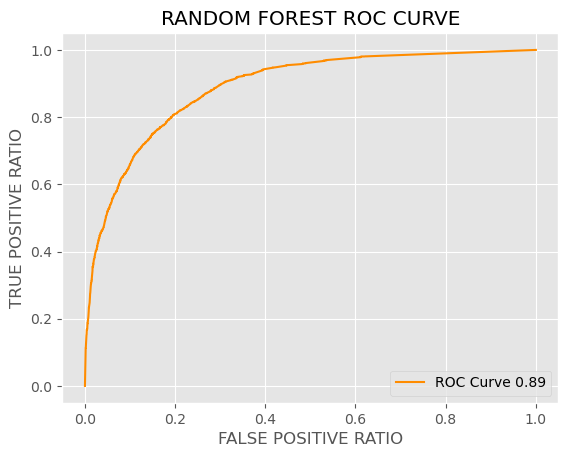

In [193]:
# ROC Curve
fpr_rand, tpr_rand, thresholds = roc_curve(y_test, rand_pred_prob, pos_label='>50K')
rand_auc = auc(fpr_rand, tpr_rand)

# Plot ROC Curve
plt.plot(fpr_rand, tpr_rand, color='darkorange', label=f'ROC Curve {rand_auc:.2f}')
plt.title('RANDOM FOREST ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.show()
#plt.grid()

#### **5.2.4 ADA Boost**

In [41]:
# Initializing the model
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)


In [126]:
# Train the Model
ada_boost_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [127]:
# Predict the Model
y_pred_ada = ada_boost_model.predict(x_test)
y_prob_ada = ada_boost_model.predict_proba(x_test)[:, 1]

In [128]:
# Evaluate the Model
ada_acc = accuracy_score(y_test, y_pred_ada)
ada_pre = precision_score(y_test, y_pred_ada, pos_label='>50K')
ada_f1 = f1_score(y_test, y_pred_ada, pos_label='>50K')
ada_recall = recall_score(y_test, y_pred_ada, pos_label='>50K')
ada_roc = roc_auc_score(y_test, y_prob_ada)


print("RESULTS")
print(f"Accuracy is: {round(ada_acc,2)}")
print(f'Precision score is: {round(ada_pre,2)}')
print(f"F1 Score is: {round(ada_f1,2)}")
print(f"Recall Score is: {round(ada_recall,2)}")
print(f"ROC Score is: {round(ada_roc,2)}")

RESULTS
Accuracy is: 0.86
Precision score is: 0.77
F1 Score is: 0.68
Recall Score is: 0.61
ROC Score is: 0.91


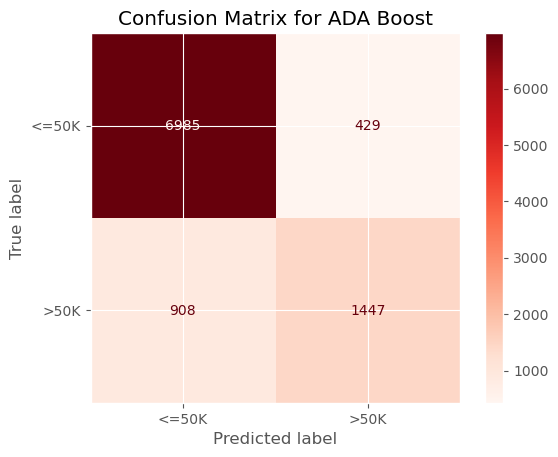

In [198]:
# Confusion Matrix
ada_conf_matrix = confusion_matrix(y_test, y_pred_ada)
ada_disp = ConfusionMatrixDisplay(confusion_matrix=ada_conf_matrix, display_labels=['<=50K', '>50K'])
ada_disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for ADA Boost')
plt.show()

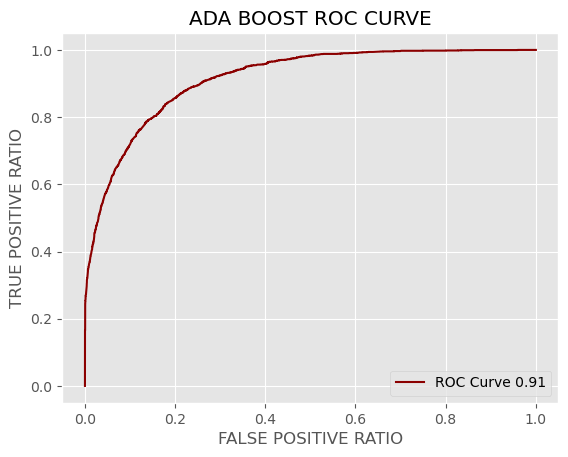

In [195]:
# ROC Curve
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_prob_ada, pos_label='>50K')
ada_auc = auc(fpr_ada, tpr_ada)

# Plot ROC Curve
plt.plot(fpr_ada, tpr_ada, color='darkred', label=f'ROC Curve {ada_auc:.2f}')
plt.title('ADA BOOST ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.show()


#### **5.2.5 K Nearest Neighbors**

In [43]:
# Initiating K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [203]:
# Training the Model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [205]:
# Predicting the Model
knn_pred = knn.predict(x_test)

# Predicting The proba
knn_pred_prob = knn.predict_proba(x_test)[:,1]

In [206]:
# Evaluate the Model
knn_acc = accuracy_score(y_test, knn_pred)
knn_pre = precision_score(y_test, knn_pred, pos_label='>50K')
knn_f1 = f1_score(y_test, knn_pred, pos_label='>50K')
knn_recall = recall_score(y_test, knn_pred, pos_label='>50K')
knn_roc = roc_auc_score(y_test, knn_pred_prob)


print("RESULTS")
print(f"Accuracy is: {round(knn_acc,2)}")
print(f'Precision score is: {round(knn_pre,2)}')
print(f"F1 Score is: {round(knn_f1,2)}")
print(f"Recall Score is: {round(knn_recall,2)}")
print(f"ROC Score is: {round(knn_roc,2)}")

RESULTS
Accuracy is: 0.83
Precision score is: 0.66
F1 Score is: 0.62
Recall Score is: 0.59
ROC Score is: 0.85


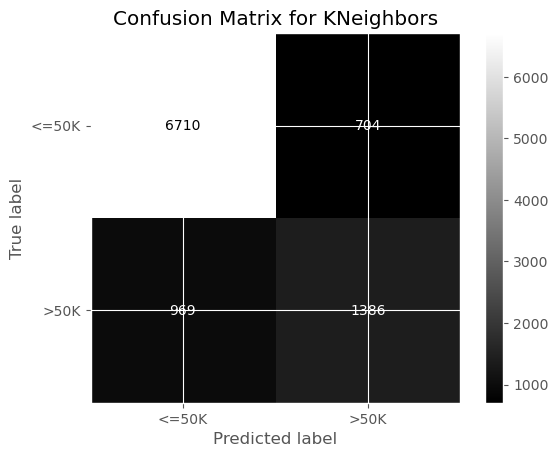

In [213]:
# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels=['<=50K', '>50K'])
knn_disp.plot(cmap=plt.cm.gray)
plt.title('Confusion Matrix for KNeighbors')
plt.show()

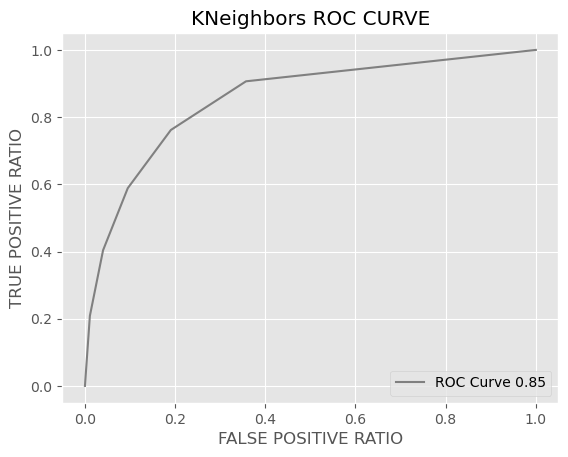

In [214]:
# ROC Curve
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, knn_pred_prob, pos_label='>50K')
knn_auc = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.plot(fpr_knn, tpr_knn, color='gray', label=f'ROC Curve {knn_auc:.2f}')
plt.title('KNeighbors ROC CURVE')
plt.legend(loc='lower right')
plt.xlabel('FALSE POSITIVE RATIO')
plt.ylabel('TRUE POSITIVE RATIO')
plt.show()


#### **5.3 MODELS COMPARISM**

In [217]:
# Creating Models Dataframe
models_comp = pd.DataFrame({
    'Models': [ 'Logistics Regression', 'Decision Tree', 'Random Forest', 'ADA Boosting', 'K-Nearest Neighbor'],
    'Accuracy': [ log_acc, clf_acc, rand_acc, ada_acc, knn_acc],
    'Precision': [ log_pre, clf_pre, rand_pre, ada_pre, knn_pre],
    'F1 Score': [ log_f1, clf_f1, rand_f1, ada_f1, knn_f1],
    'Recall': [ log_recall, clf_recall, rand_recall, ada_recall, knn_recall],
    'ROC AUC': [ roc_auc_log, clf_roc_auc, rand_roc, ada_roc, knn_roc]
})

models_comp

,Models,Accuracy,Precision,F1 Score,Recall,ROC AUC
0,Logistics Regression,0.847784,0.736900,0.644853,0.573248,0.902137
1,Decision Tree,0.822295,0.638603,0.621622,0.605520,0.772223
2,Random Forest,0.846658,0.711605,0.657991,0.611890,0.888201
3,ADA Boosting,0.863138,0.771322,0.683999,0.614437,0.914586
4,K-Nearest Neighbor,0.828744,0.663158,0.623622,0.588535,0.853603


#### **5.4 ROC CURVE COMPARISM**

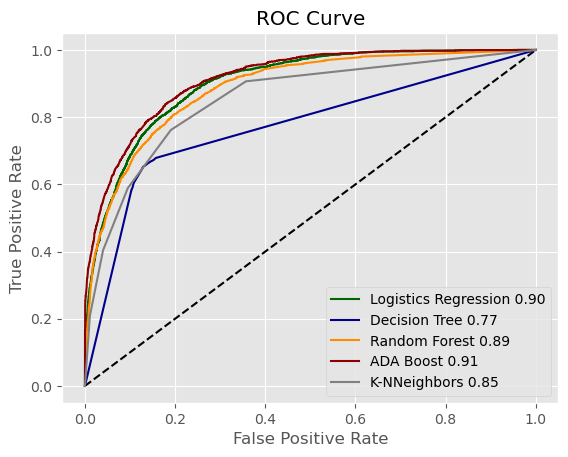

In [222]:
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for reference
plt.plot(fpr_log, tpr_log, color='darkgreen', label=f'Logistics Regression {log_auc:.2f}')
plt.plot(fpr_clf, tpr_clf, color='darkblue', label=f'Decision Tree {clf_auc:.2f}')
plt.plot(fpr_rand, tpr_rand, color='darkorange', label=f'Random Forest {rand_auc:.2f}')
plt.plot(fpr_ada, tpr_ada, color='darkred', label=f'ADA Boost {ada_auc:.2f}')
plt.plot(fpr_knn, tpr_knn, color='gray', label=f'K-NNeighbors {knn_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### **6.0 SUMMARY AND RECOMMENDATION**

#### **6.1 Key insight from EDA**

**1. Income Distribution:**
•The dataset has many more people who earn less than $50,000 than those who earn more. This means we need to be careful when training our machine learning models so they don't favor the larger group and ignore the smaller one.

**2. Age and Income:**
• The data shows a strong link between age and income. Older individuals tend to earn more than younger ones.

**3. Education Level and Income:**
• People with higher education tend to earn more money. Those with advanced degrees are more likely to earn over $50,000. This shows that education is a key factor in determining income

**4. Occupational Impact:**
• From the Census Data job type matters for income, with some jobs paying more than others.

**5. Marital Status and Income:**
• Marital status appears to influence income, with married individuals, especially those 
who are married-civ-spouse, more likely to earn >50K dollars. This could be due to 
various socio-economic factors and stability associated with marriage.

#### **6.2 Models Performance**

**Based on the results, here's a discussion of the performance of each model:**

1. **Logistic Regression:**
    - High accuracy (0.85) and ROC score (0.9)
    - Moderate precision (0.74) and F1 score (0.64)
    - Lower recall score (0.57)
    - Good overall performance, but may struggle with false negatives
2. **Decision Tree:**
    - Lower accuracy (0.82) and ROC score (0.77) compared to Logistic Regression
    - Similar precision (0.74) and F1 score (0.64)
    - Same recall score (0.57)
    - May be more prone to overfitting
3. **Random Forest:**
    - High accuracy (0.85) and ROC score (0.89)
    - Slightly lower precision (0.71) and F1 score (0.66) compared to Logistic Regression
    - Higher recall score (0.61)
    - Good overall performance, with improved recall
4. **Ada Boost:**
    - Highest accuracy (0.86) and ROC score (0.91)
    - Higher precision (0.77) and F1 score (0.68)
    - Same recall score (0.61)
    - Best overall performance, with good balance between precision and recall
5. **K-Nearest Neighbor:**
    - Lower accuracy (0.83) and ROC score (0.85) compared to top performers
    - Lower precision (0.66) and F1 score (0.62)
    - Similar recall score (0.59)
    - May be more sensitive to noise and outliers

**Based on the results, I suggest using Ada Boost as the primary model, followed by Random Forest and Logistic Regression as secondary options. These models demonstrate a good balance between accuracy, precision, and recall, with Ada Boost showing the best overall performance.**


#### **6.2 Recommendation**

Based on the evaluation results, we strongly recommend using Ada Boost as the primary machine learning model for predicting income levels (>50K or <=50K) based on census data. This model demonstrated exceptional performance across key metrics:


Key Strengths:

1. Highest accuracy (0.86)
2. Best ROC score (0.91)
3. High precision (0.77)
4. Good recall (0.61)
5. Balanced performance between precision and recall


Secondary Options:

1. Random Forest: Suitable alternative with high accuracy (0.85) and ROC score (0.89)
2. Logistic Regression: Simple and effective model with high accuracy (0.85) and ROC score (0.9)


Rationale:

1. Ada Boost's superior performance across multiple metrics makes it the top choice.
2. Random Forest and Logistic Regression provide similar performance, making them suitable secondary options.
3. Decision Tree and K-Nearest Neighbor models, while acceptable, do not match the performance of the top three models.


Implementation Plan:

1. Train and tune Ada Boost model on the full dataset.
2. Deploy Ada Boost model in production.
3. Monitor performance and retrain as necessary.
4. Consider using Random Forest or Logistic Regression as backup models.







### **SAVING THE MODELS WITH JOBLIB**

#### Logistic Regression Model

In [36]:
joblib.dump(log_model, 'Logistic_Regression_Model.pkl')

['Logistic_Regression_Model.pkl']

#### Decision Tree Model

In [39]:
joblib.dump(clf, 'Decision_Tree_Model.pkl')

['Decision_Tree_Model.pkl']

#### Random Forest Model

In [44]:
joblib.dump(rand_forest, 'Random_Forest_Model.pkl')

['Random_Forest_Model.pkl']

#### ADA Boosting Model

In [45]:
joblib.dump(ada_boost_model, 'ADA_Boosting_Model.pkl')

['ADA_Boosting_Model.pkl']

#### K-Nearest Neighbor Model

In [46]:
joblib.dump(knn, 'K_Nearest_Neighbor_Model.pkl')

['K_Nearest_Neighbor_Model.pkl']